In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Loading the 50startups dataset.

In [2]:
startups = pd.read_csv("/content/50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#reviewing the data

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


column data types are no need to change and no missing values as well but for our convenience rename the column names

In [4]:
startups1 = startups.rename(columns={"R&D Spend":"RD","Administration":"Admin","Marketing Spend":"Marketing"})
startups1.head(2)

,RD,Admin,Marketing,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


#converting categorical variable into integer using one hot encoding 

In [5]:
startups2 = pd.get_dummies(startups1,drop_first=True)
startups2.head(2)

,RD,Admin,Marketing,Profit,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,0,0


In [6]:
startups2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Admin           50 non-null     float64
 2   Marketing       50 non-null     float64
 3   Profit          50 non-null     float64
 4   State_Florida   50 non-null     uint8  
 5   State_New York  50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


#Univariate Analysis

In [7]:
startups1.describe().T

,count,mean,std,min,25%,50%,75%,max
RD,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Admin,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


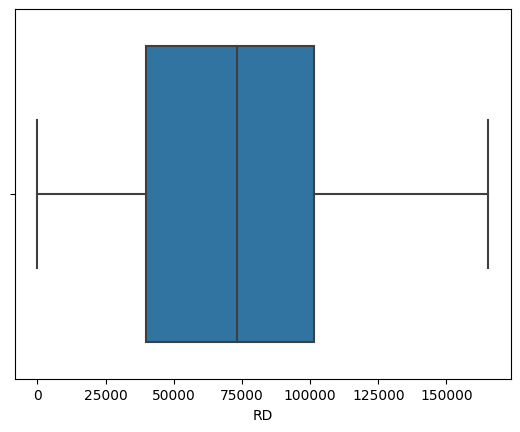

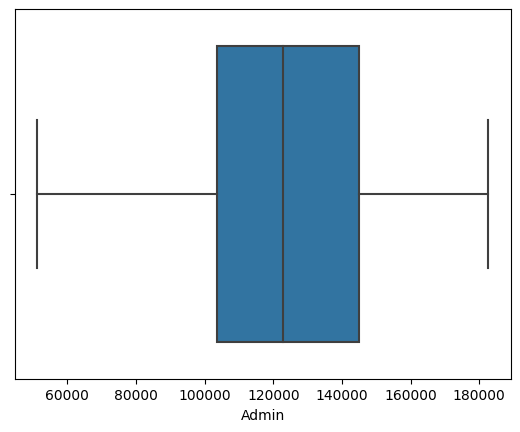

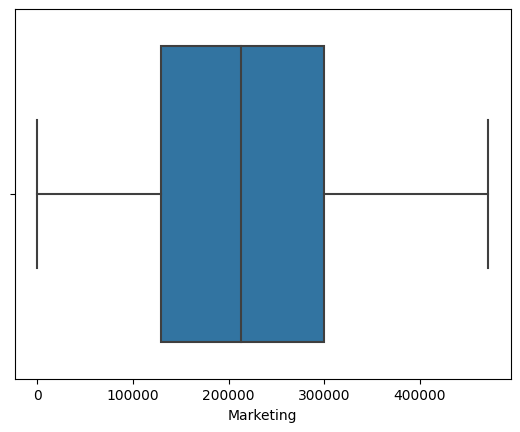

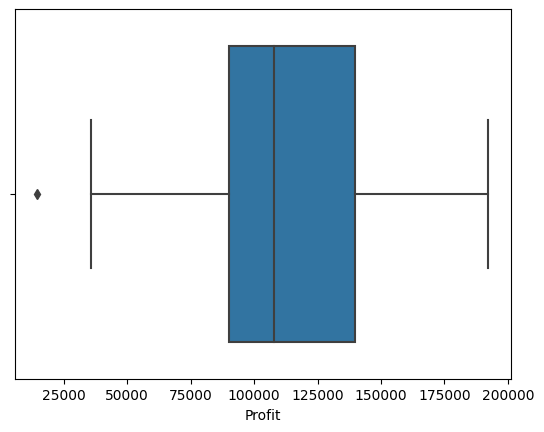

In [8]:
for i in startups1.columns:
  if startups1[i].dtype == "float64":
    sns.boxplot(x=i, data=startups1)
    plt.show()

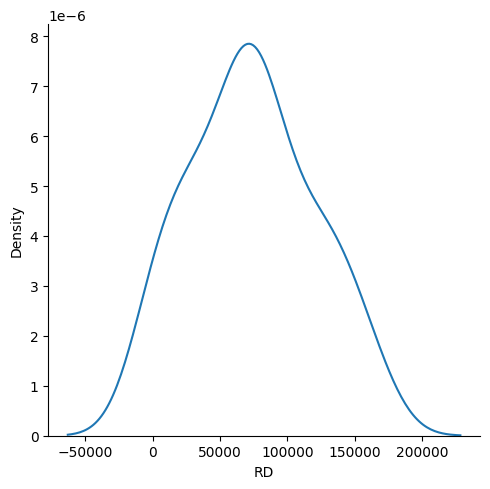

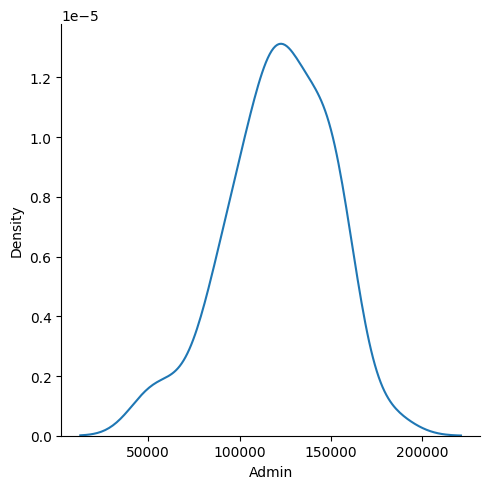

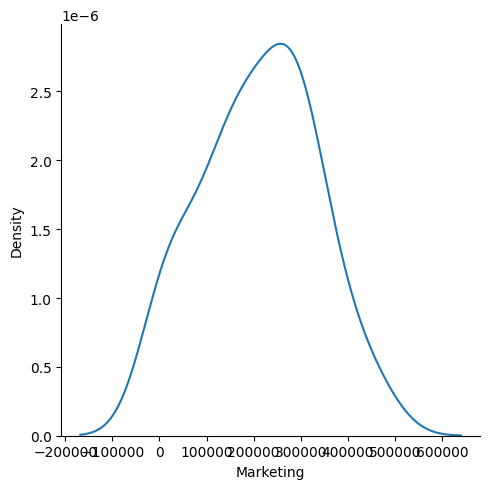

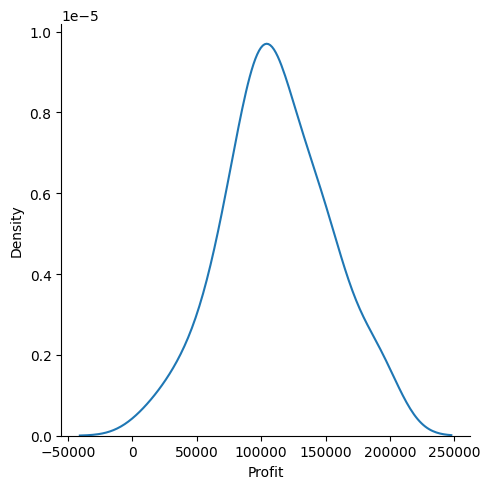

In [9]:
for i in startups2.columns:
  if startups2[i].dtype == "int64" or startups2[i].dtype == "float64":
    sns.displot(startups2[i],kind='kde')
    plt.show()


#Bivariate Plots

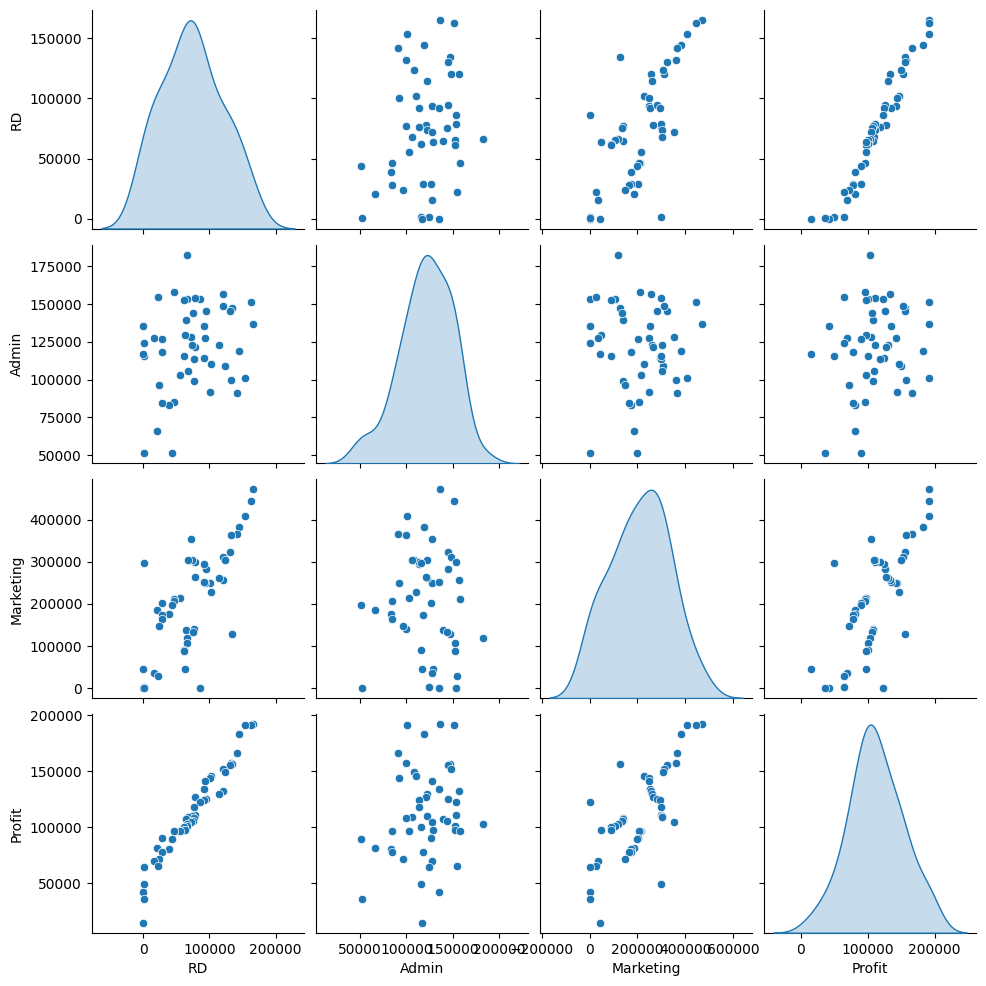

In [10]:
startups_attr = startups2.iloc[:,0:4]
sns.pairplot(startups_attr,diag_kind="kde")

observations between profit and RD indicates linear relationship, with marketing found moderate linear relationship but with adminstration not really linear.

In [11]:
startups_attr.corr()

,RD,Admin,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In between RD and Marketing also have some good linear relation.

<Axes: >

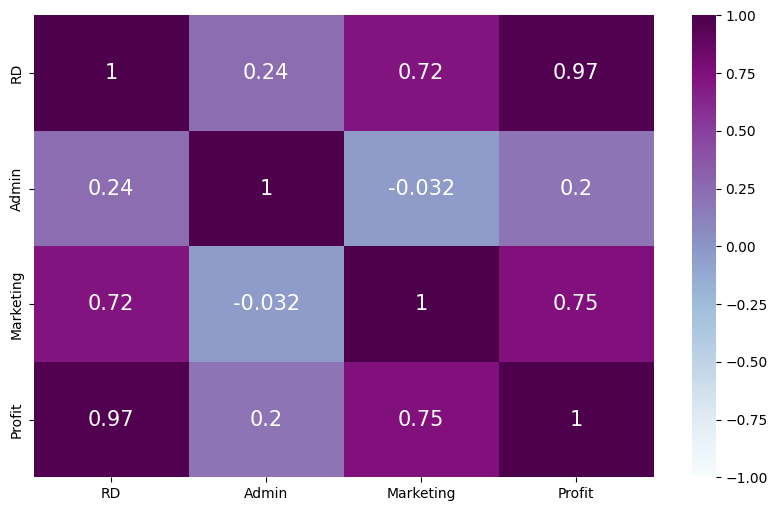

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(startups_attr.corr(), annot=True, vmin=-1, vmax=1, cmap='BuPu', annot_kws={'size': 15})

#split the data

In [13]:
x = startups2.drop(['Profit'],axis=1)
y = startups2['Profit']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

#Fit Linear Model

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
model.score(X_train,y_train)

0.9511471170962384

In [17]:
model.score(X_test,y_test)

0.93971080633682

it seems good model and no overfitting as well lets check RMSE value also

In [18]:
from sklearn.metrics import mean_squared_error
y_train_predict = model.predict(X_train)

In [19]:
mse = mean_squared_error(y_train, y_train_predict)
BaseModel_RMSE = np.sqrt(mse)
BaseModel_RMSE

9030.803518990462

In [20]:
modelValidation_metrics = pd.DataFrame()

In [21]:
modelValidation_metrics['model'] = ['BaseModel']
modelValidation_metrics['train_adjR'] = [0.951]
modelValidation_metrics['test_adjR'] = [0.939]
modelValidation_metrics['RMSE'] = [9030.803]
modelValidation_metrics

,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.951,0.939,9030.803


#scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [23]:
X_train_sc.head(2)

,RD,Admin,Marketing,State_Florida,State_New York
0,1.309487,0.946637,-0.855429,-0.722315,-0.677003
1,-0.966618,-1.507490,-0.536649,1.384437,-0.677003


In [24]:
std_BaseModel = LinearRegression()
std_BaseModel.fit(X_train_sc,y_train)

LinearRegression()

In [25]:
print("trainScore",std_BaseModel.score(X_train_sc,y_train))
print("testScore", std_BaseModel.score(X_test_sc,y_test))

trainScore 0.9511471170962384
testScore 0.9397108063355787


scaling data is not improving model adjRsquare value anyhow lets check rmse value as well.

In [26]:
y_train_predict = std_BaseModel.predict(X_train_sc)
mse = mean_squared_error(y_train,y_train_predict)
rsme = np.sqrt(mse)
rsme

9030.803518990466

In [27]:
new_row = pd.Series(['Std_BaseModel', 0.951, 0.939, 9030.803], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=1)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-27-25fab911b29b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.951,0.939,9030.803
1,Std_BaseModel,0.951,0.939,9030.803


# checking multicollinearity 

In [28]:
#vif calculations
import statsmodels.formula.api as smf
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_RD=smf.ols("RD~Admin+Marketing",data=startups_attr).fit().rsquared
vif_RD=1/(1-rsq_RD)

rsq_AD=smf.ols("Admin~RD+Marketing",data=startups_attr).fit().rsquared
vif_AD=1/(1-rsq_AD)

rsq_MK=smf.ols("Marketing~RD+Admin",data=startups_attr).fit().rsquared
vif_MK=1/(1-rsq_MK)

# Putting the values in Dataframe format
d1={'Variables':['RD','AD','MK'],'Vif':[vif_RD,vif_AD,vif_MK]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,Vif
0,RD,2.468903
1,AD,1.175091
2,MK,2.326773


#alternative way to find vif values

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = startups_attr[['RD', 'Admin', 'Marketing']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,8.384571,RD
1,4.026406,Admin
2,7.593984,Marketing


in both ways vif values are less than 10 so we can tell there is no muliti collinearity ill effect between independent variables.

In [30]:
startups2.head()

,RD,Admin,Marketing,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [31]:
#base model predictions
startups2['predicted_profit'] = model.predict(x)
startups2.head

<bound method NDFrame.head of            RD      Admin  Marketing     Profit  State_Florida  State_New York  \
0   165349.20  136897.80  471784.10  192261.83              0               1   
1   162597.70  151377.59  443898.53  191792.06              0               0   
2   153441.51  101145.55  407934.54  191050.39              1               0   
3   144372.41  118671.85  383199.62  182901.99              0               1   
4   142107.34   91391.77  366168.42  166187.94              1               0   
5   131876.90   99814.71  362861.36  156991.12              0               1   
6   134615.46  147198.87  127716.82  156122.51              0               0   
7   130298.13  145530.06  323876.68  155752.60              1               0   
8   120542.52  148718.95  311613.29  152211.77              0               1   
9   123334.88  108679.17  304981.62  149759.96              0               0   
10  101913.08  110594.11  229160.95  146121.95              1               0  

In [32]:
#scaled data model predictions
startups2['prdeicted_stdmodel_profit'] = std_BaseModel.predict(sc.transform(x))
startups2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,RD,Admin,Marketing,Profit,State_Florida,State_New York,predicted_profit,prdeicted_stdmodel_profit
0,165349.20,136897.80,471784.10,192261.83,0,1,190021.939092,190021.939092
1,162597.70,151377.59,443898.53,191792.06,0,0,186938.246210,186938.246210
2,153441.51,101145.55,407934.54,191050.39,1,0,183600.807692,183600.807692
3,144372.41,118671.85,383199.62,182901.99,0,1,172313.871394,172313.871394
4,142107.34,91391.77,366168.42,166187.94,1,0,174195.357726,174195.357726


As expected both prdections are same

In [33]:
startups2['error'] = startups2['Profit'] -startups2['predicted_profit']
startups2.head()

,RD,Admin,Marketing,Profit,State_Florida,State_New York,predicted_profit,prdeicted_stdmodel_profit,error
0,165349.20,136897.80,471784.10,192261.83,0,1,190021.939092,190021.939092,2239.890908
1,162597.70,151377.59,443898.53,191792.06,0,0,186938.246210,186938.246210,4853.813790
2,153441.51,101145.55,407934.54,191050.39,1,0,183600.807692,183600.807692,7449.582308
3,144372.41,118671.85,383199.62,182901.99,0,1,172313.871394,172313.871394,10588.118606
4,142107.34,91391.77,366168.42,166187.94,1,0,174195.357726,174195.357726,-8007.417726


#Residual Analysis

#Test for Normality of Residuals (Q-Q Plot)

# one way to draw errors(residuals)qq plot 

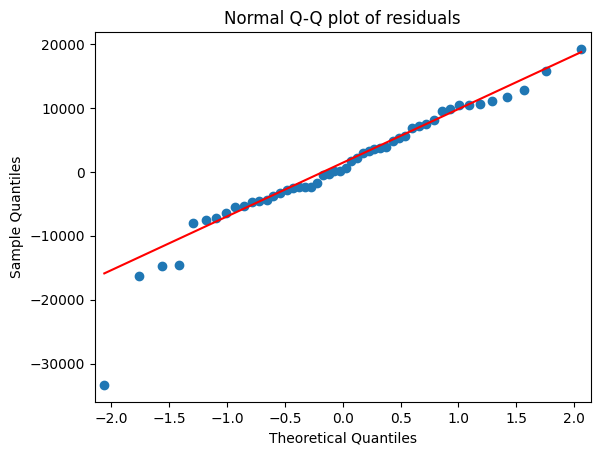

In [34]:
import statsmodels.api as sm
qqplot=sm.qqplot(startups2['error'],line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

#Residual Plot for Homoscedasticity

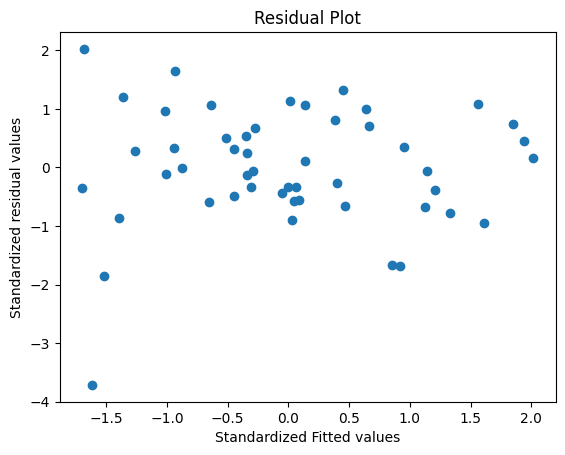

In [35]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(startups2['predicted_profit']),
            get_standardized_values(startups2['error']))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

no pattern observerd in residual plot which means good

#Model Diagnostics
#Detecting Influencers/Outliers
#Cook’s Distance

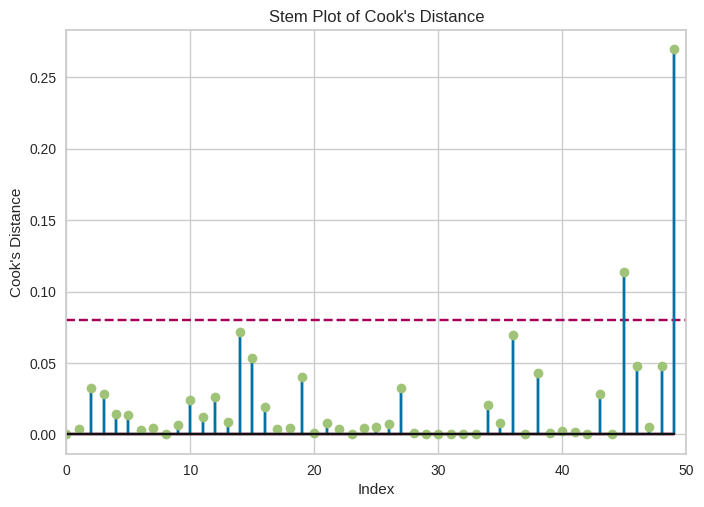

In [36]:
from yellowbrick.regressor import CooksDistance

# create a Cook's Distance plot
cd_plot = CooksDistance()
cd_plot.fit(x, y)

# create a stem plot of Cook's Distance
plt.stem(cd_plot.distance_, linefmt='C0-', markerfmt='C1o', basefmt='k-')
plt.title("Stem Plot of Cook's Distance")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()


In [37]:
np.argmax(cd_plot.distance_)

49

In [38]:
np.max(cd_plot.distance_)

0.26960312985648466

#lets drop index 49 record and check model metrics

In [39]:
startups2_new =startups2.drop(startups2.index[[ 49]],axis=0).reset_index()

In [40]:
startups2_new

,index,RD,Admin,Marketing,Profit,State_Florida,State_New York,predicted_profit,prdeicted_stdmodel_profit,error
0,0,165349.20,136897.80,471784.10,192261.83,0,1,190021.939092,190021.939092,2239.890908
1,1,162597.70,151377.59,443898.53,191792.06,0,0,186938.246210,186938.246210,4853.813790
2,2,153441.51,101145.55,407934.54,191050.39,1,0,183600.807692,183600.807692,7449.582308
3,3,144372.41,118671.85,383199.62,182901.99,0,1,172313.871394,172313.871394,10588.118606
4,4,142107.34,91391.77,366168.42,166187.94,1,0,174195.357726,174195.357726,-8007.417726
5,5,131876.90,99814.71,362861.36,156991.12,0,1,163405.789145,163405.789145,-6414.669145
6,6,134615.46,147198.87,127716.82,156122.51,0,0,155921.276749,155921.276749,201.233251
7,7,130298.13,145530.06,323876.68,155752.60,1,0,158562.133604,158562.133604,-2809.533604
8,8,120542.52,148718.95,311613.29,152211.77,0,1,148381.040972,148381.040972,3830.729028
9,9,123334.88,108679.17,304981.62,149759.96,0,0,155331.678091,155331.678091,-5571.718091


In [41]:
#Drop the original index
startups2_new = startups2_new.drop(['index'],axis=1)

lets build the model

In [42]:
x = startups2_new.drop(columns={"Profit","predicted_profit","error","prdeicted_stdmodel_profit"})
y = startups2_new['Profit']

#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# fit the model
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [43]:
print("model1 train score is ", model1.score(X_train,y_train))
print("model1 test score is ", model1.score(X_test, y_test))

model1 train score is  0.964468293702442
model1 test score is  0.9484326566909377


In [44]:
y_train_predict = model1.predict(X_train)
mse = mean_squared_error(y_train,y_train_predict)
rsme = np.sqrt(mse)
rsme

7153.714291928061

In [45]:
new_row = pd.Series(['Model1', 0.964, 0.948, 7153.714], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=2)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-45-ad0b353f969f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.951,0.939,9030.803
1,Std_BaseModel,0.951,0.939,9030.803
2,Model1,0.964,0.948,7153.714


# 2nd iteration(final model2)

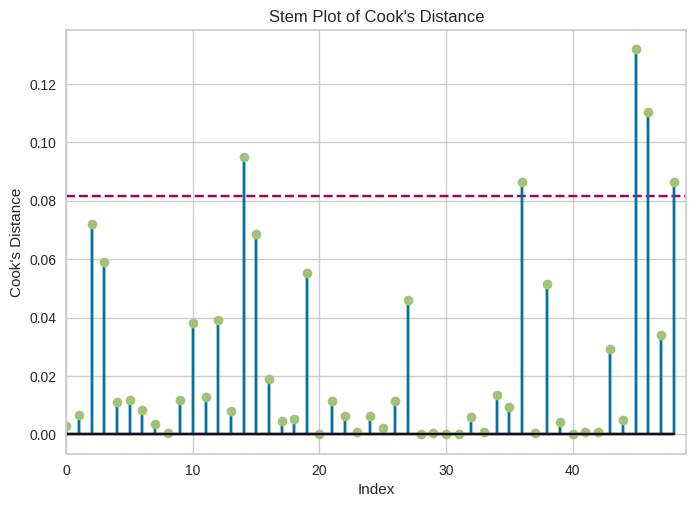

In [46]:
# create a Cook's Distance plot
cd_plot = CooksDistance()
cd_plot.fit(x, y)

# create a stem plot of Cook's Distance
plt.stem(cd_plot.distance_, linefmt='C0-', markerfmt='C1o', basefmt='k-')
plt.title("Stem Plot of Cook's Distance")
plt.xlabel("Index")
plt.ylabel("Cook's Distance")
plt.show()

In [51]:
greater_than_0_10 = cd_plot.distance_[cd_plot.distance_ > 0.10]
greater_than_0_10

45    0.131831
46    0.110316
dtype: float64

let's drop both records and see metrics how model got improved.

In [55]:
startups3_new =startups2_new.drop(startups2_new.index[[45,46]],axis=0).reset_index()

#Drop the original index
startups3_new = startups3_new.drop(['index'],axis=1)

x = startups3_new.drop(columns={"Profit","predicted_profit","error","prdeicted_stdmodel_profit"})
y = startups3_new['Profit']

#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# fit the model
model2 = LinearRegression()
model2.fit(X_train,y_train)
print("model2 train score ", model2.score(X_train,y_train))
print("model2 test score ", model2.score(X_test,y_test))

y_train_predict = model2.predict(X_train)
mse = mean_squared_error(y_train,y_train_predict)
rsme = np.sqrt(mse)
rsme

model2 train score  0.9713056587409349
model2 test score  0.9268380464261683


6445.5803554393915

model2 is little overfitted model compare to other models.

In [56]:
new_row = pd.Series(['Model2', 0.971, 0.926, 6445.580], index=['model', 'train_adjR', 'test_adjR', 'RMSE'], name=3)
modelValidation_metrics = modelValidation_metrics.append(new_row)
modelValidation_metrics

<ipython-input-56-0ce6552a7bb4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modelValidation_metrics = modelValidation_metrics.append(new_row)


,model,train_adjR,test_adjR,RMSE
0,BaseModel,0.951,0.939,9030.803
1,Std_BaseModel,0.951,0.939,9030.803
2,Model1,0.964,0.948,7153.714
3,Model2,0.971,0.926,6445.580


#comparing all models adjRsquare and RMSE values we can tell model1 is final model.